## X-RAY MEDICAL IMAGE CAPTIONING PROJECT

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [8]:
import os

print(os.listdir('.'))  
# This will list all files in the current directory


['.ipynb_checkpoints', 'medical_caption.ipynb', 'test', 'train', 'validation']


# FILE PATHS


In [12]:
import pandas as pd
import os

#Paths to CSV files for train, validation, and test sets
train_path = r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiologytraindata.csv'


val_path= r'C:\Users\PRATIK\OneDrive\Desktop\all_data\validation\radiologyvaldata.csv'


test_path= r'C:\Users\PRATIK\OneDrive\Desktop\all_data\test\radiologytestdata.csv'


# List of all file paths
file_paths = [train_path, val_path, test_path]

# Check if all files exist and load them
datasets = {}
missing_files = []

for path in file_paths:
    if os.path.exists(path):
        print(f"File found: {path}")
        # Load the data into a DataFrame
        dataset_name = os.path.basename(path).split('.')[0]  # e.g., radiologytraindata
        datasets[dataset_name] = pd.read_csv(path)
        print(f"Data from {dataset_name} loaded successfully!")
    else:
        print(f"File not found: {path}")
        missing_files.append(path)

# If there are missing files, print them
if missing_files:
    print("Some files are missing. Please verify the following paths:")
    for file_path in missing_files:
        print(file_path)
else:
    # If all files are loaded, explore the data
    for dataset_name, data in datasets.items():
        print(f"\n{dataset_name} Data:")
        print(data.head())
        print(f"Shape of {dataset_name}: {data.shape}")


File found: C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiologytraindata.csv
Data from radiologytraindata loaded successfully!
File found: C:\Users\PRATIK\OneDrive\Desktop\all_data\validation\radiologyvaldata.csv
Data from radiologyvaldata loaded successfully!
File found: C:\Users\PRATIK\OneDrive\Desktop\all_data\test\radiologytestdata.csv
Data from radiologytestdata loaded successfully!

radiologytraindata Data:
           id                                    name  \
0  ROCO_00002          PMC4083729_AMHSR-4-14-g002.jpg   
1  ROCO_00003       PMC2837471_IJD2009-150251.001.jpg   
2  ROCO_00004  PMC2505281_11999_2007_30_Fig6_HTML.jpg   
3  ROCO_00005       PMC3745845_IJD2013-683423.005.jpg   
4  ROCO_00007   PMC4917066_amjcaserep-17-301-g001.jpg   

                                             caption  
0   Computed tomography scan in axial view showin...  
1   Bacterial contamination occurred after comple...  
2   The patient had residual paralysis of the han...  
3    Panoramic

# Loading the data

In [6]:
# File paths
import pandas as pd

train_path = r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiologytraindata.csv'


train_data = pd.read_csv(train_path)
# Add this line after loading and preprocessing the data
print(train_data.shape)
# Print specific columns

print(train_data.columns)
#display of data
print(train_data)




(65450, 3)
Index(['id', 'name', 'caption'], dtype='object')
               id                                           name  \
0      ROCO_00002                 PMC4083729_AMHSR-4-14-g002.jpg   
1      ROCO_00003              PMC2837471_IJD2009-150251.001.jpg   
2      ROCO_00004         PMC2505281_11999_2007_30_Fig6_HTML.jpg   
3      ROCO_00005              PMC3745845_IJD2013-683423.005.jpg   
4      ROCO_00007          PMC4917066_amjcaserep-17-301-g001.jpg   
...           ...                                            ...   
65445  ROCO_81819  PMC3517833_CRIM.HEMATOLOGY2012-490438.001.jpg   
65446  ROCO_81820               PMC5487234_rb-50-03-0190-g13.jpg   
65447  ROCO_81821                 PMC2974222_kjr-11-612-g001.jpg   
65448  ROCO_81822                 PMC3532764_AJNS-7-151-g002.jpg   
65449  ROCO_81823               PMC3509000_pone.0050319.g002.jpg   

                                                 caption  
0       Computed tomography scan in axial view showin...  
1    

# Text Preprocessing:-This part remains the same. It processes the text data by converting to lowercase, removing links,new lines, words with numbers, extra spaces, special characters, stop words, and applying stemming and lemmatization

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Ensure stopwords and wordnet are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load the stopwords list
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # 1. Lower Case
    text = text.lower()
    
    # 2. Remove Links
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # 3. Remove New Lines (\n)
    text = text.replace('\n', ' ')
    
    # 4. Remove Words Containing Numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    # 5. Remove Extra Spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 6. Remove Special Characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # 7. Remove Stop Words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # 8. Stemming
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    
    # 9. Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# File paths
train_path = r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiologytraindata.csv'

# Load the data
train_data = pd.read_csv(train_path)

# Apply preprocessing to the caption column and store it in a new column
train_data['cleaned_caption'] = train_data['caption'].apply(preprocess_text)

# Check the result
print(train_data[['caption', 'cleaned_caption']].head())

# Display the shape of the data
print(train_data.shape)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRATIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRATIK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             caption  \
0   Computed tomography scan in axial view showin...   
1   Bacterial contamination occurred after comple...   
2   The patient had residual paralysis of the han...   
3    Panoramic radiograph after immediate loading.\n   
4   Plain abdomen x-ray: Multiple air levels at t...   

                                     cleaned_caption  
0  comput tomographi scan axial view show obliter...  
1  bacteri contamin occur complet root canal trea...  
2  patient residu paralysi hand poliomyel necessa...  
3                     panoram radiograph immedi load  
4  plain abdomen xray multipl air level midabdome...  
(65450, 4)


# Checking Missing Images

In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [1]:
import pandas as pd
import os
import cv2
from tqdm import tqdm

# Define paths to CSV files for train, validation, and test sets
train_path = r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiologytraindata.csv'

# Load the data
train_data = pd.read_csv(train_path)

# Directory containing the images
image_dir = r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiology\images'

# Initialize a list to hold missing images
missing_images = []

# Identify missing images
for img_name in tqdm(train_data['name'], desc="Checking images"):
    img_path = os.path.join(image_dir, img_name)
    if not os.path.exists(img_path):
        missing_images.append(img_name)

# Print number of missing images
print(f"Number of missing images: {len(missing_images)}")

# Remove rows with missing images from the DataFrame
train_data_cleaned = train_data[~train_data['name'].isin(missing_images)]

# Save the cleaned data to a new CSV file
cleaned_csv_path = r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiologytraindata_cleaned.csv'
train_data_cleaned.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned data saved to {cleaned_csv_path}")


Checking images: 100%|█████████████████████████████████████████████████████████| 65450/65450 [00:10<00:00, 5960.13it/s]


Number of missing images: 30
Cleaned data saved to C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiologytraindata_cleaned.csv


# Image Preprocessing:- 1000  Samples Images taken and by created batches due to overload of images and  jupyter notebook is crashed 

Processing images: 100%|███████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.29it/s]


Number of missing images: 0
(1000, 5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


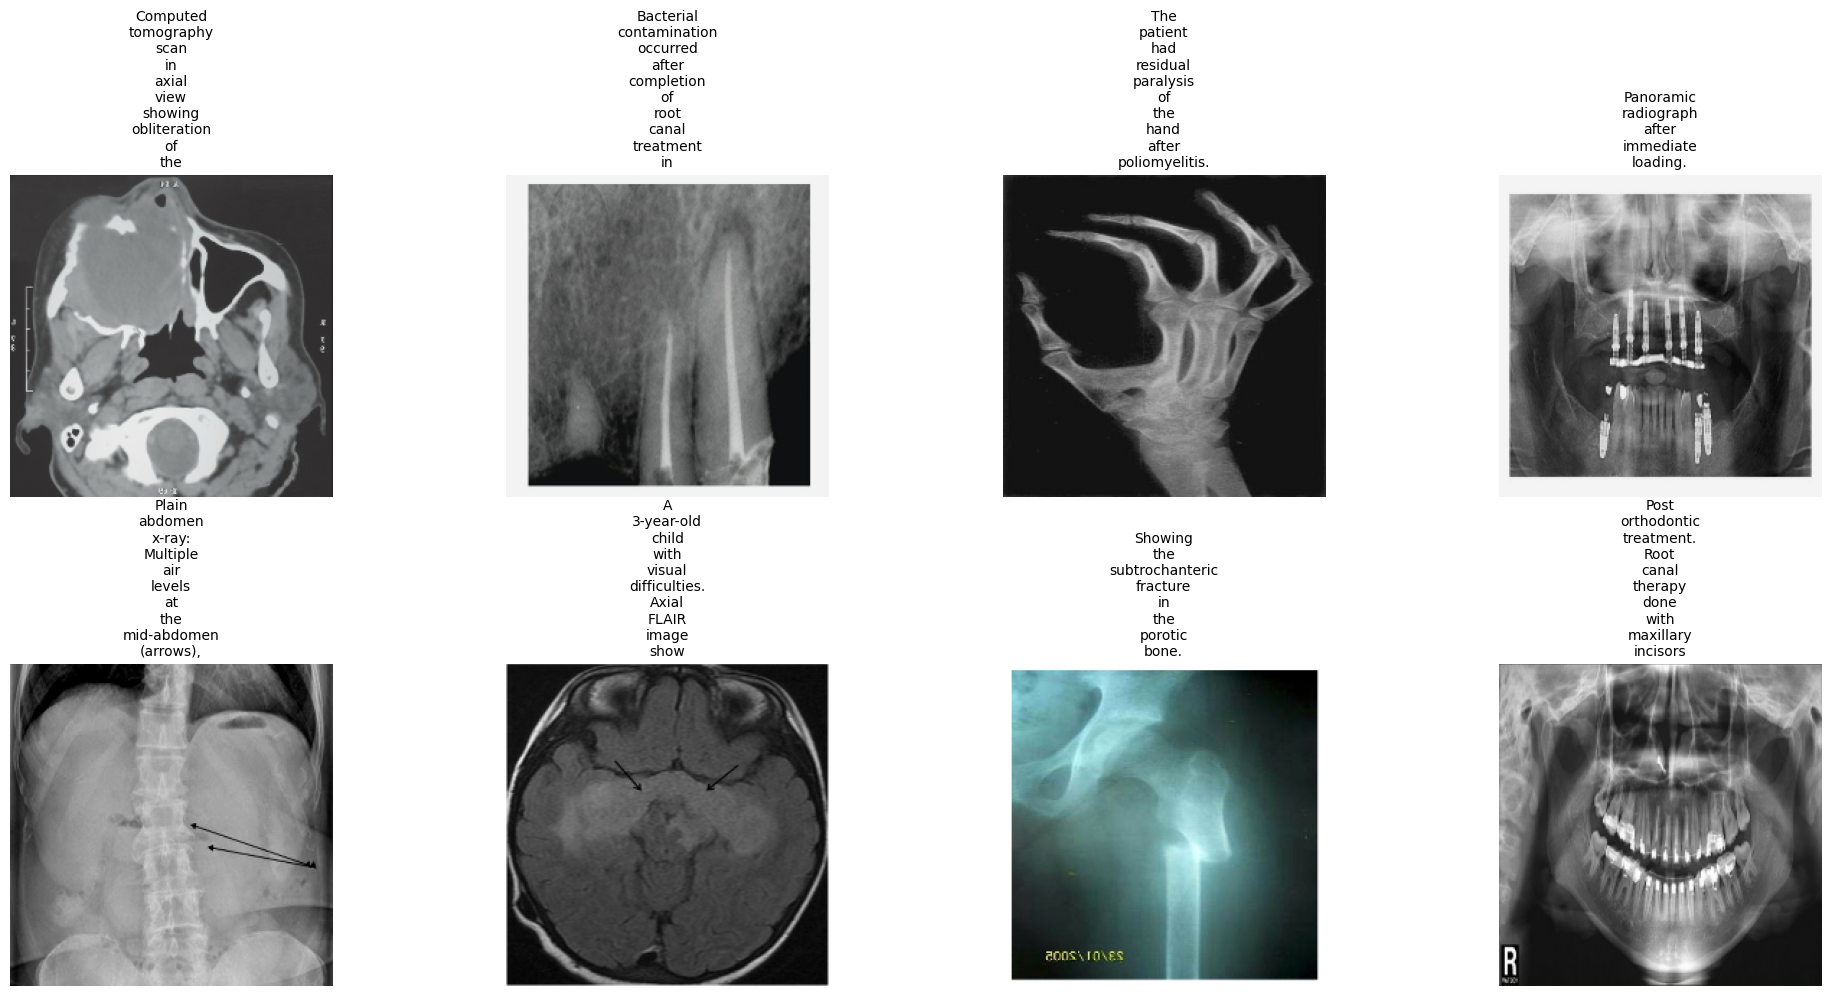

In [1]:
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define image loading function using TensorFlow
def load_image(image_path):
    image = tf.io.read_file(image_path)  # Read image file
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG image
    return image

# Define image preprocessing function using TensorFlow
def preprocess_image(image, target_size=(224, 224)):
    image = tf.image.resize(image, target_size)  # Resize the image
    image = tf.image.random_flip_left_right(image)  # Random flip
    image = tf.image.random_brightness(image, max_delta=0.1)  # Random brightness
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # Random contrast
    image = image / 255.0  # Normalize pixel values
    return image

# File path for training data
train_path = r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiologytraindata.csv'

# Load the preprocessed text data
train_data = pd.read_csv(train_path)

# Ensure 'cleaned_caption' column exists, if not, use 'caption' column
if 'cleaned_caption' not in train_data.columns:
    train_data['cleaned_caption'] = train_data['caption']

# Limit to the first 1000 images
train_data = train_data.head(1000)

# Directory containing the images
image_dir = r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiology\images'

# Load images and check for missing ones
image_data = []
missing_images = []

# Process images
for img_name in tqdm(train_data['name'], desc="Processing images"):
    img_path = os.path.join(image_dir, img_name)
    try:
        img = load_image(img_path)
        img = preprocess_image(img)
        image_data.append(img.numpy())  # Convert Tensor to NumPy array
    except Exception as e:
        print(f"Error loading image {img_name}: {e}")
        missing_images.append(img_name)

# Report missing images
print(f"Number of missing images: {len(missing_images)}")
if missing_images:
    print("Missing images:")
    for img_name in missing_images[:10]:  # Print only first 10 missing images for brevity
        print(img_name)

# Filter out rows with missing images
train_data = train_data[~train_data['name'].isin(missing_images)]

# Add the processed images to the DataFrame
train_data = train_data.iloc[:len(image_data)]
train_data['image'] = image_data

# Display the shape of the data
print(train_data.shape)

# Display the first 8 images and their cleaned captions
if not train_data.empty:
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    for i, ax in enumerate(axs.flatten()):
        if i < len(train_data):
            example_row = train_data.iloc[i]
            ax.imshow(example_row['image'])
            caption = example_row['cleaned_caption']
            ax.set_title("\n".join(caption.split()[:10]), fontsize=10)
            ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No images were loaded successfully.")


# Model 1

In [ ]:
#Divide the dataset in to Train (70%), Test (20%) and Validation (10%) datasets.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming dataset is already loaded and preprocessed
# Here's an example dataset definition:
dataset = pd.DataFrame({
    'id': range(1000),
    'name': ['image_{}.jpg'.format(i) for i in range(1000)],
    'caption': ['This is caption {}'.format(i) for i in range(1000)],
    'cleaned_caption': ['cleaned caption {}'.format(i) for i in range(1000)],
    'image': [np.random.rand(224, 224, 3) for i in range(1000)]  # Assuming images are already preprocessed
})

# Split the data into train (70%) and temp (30%) first
train_data, temp_data = train_test_split(dataset, test_size=0.3, random_state=42)

# Further split temp into test (20%) and validation (10%)
test_data, validation_data = train_test_split(temp_data, test_size=1/3, random_state=42)

print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')
print(f'Validation data shape: {validation_data.shape}')


Train data shape: (700, 5)
Test data shape: (200, 5)
Validation data shape: (100, 5)


# DATA PREPRATION

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_text_length = 100
embedding_dim = 256
vocab_size = 10000

# Tokenize and pad text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['cleaned_caption'])
train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_caption'])
train_sequences = pad_sequences(train_sequences, maxlen=max_text_length, padding='post')
train_targets = np.array(train_sequences)[:, 1:]

test_sequences = tokenizer.texts_to_sequences(test_data['cleaned_caption'])
test_sequences = pad_sequences(test_sequences, maxlen=max_text_length, padding='post')
test_targets = np.array(test_sequences)[:, 1:]

validation_sequences = tokenizer.texts_to_sequences(validation_data['cleaned_caption'])
validation_sequences = pad_sequences(validation_sequences, maxlen=max_text_length, padding='post')
validation_targets = np.array(validation_sequences)[:, 1:]

# Convert image data to numpy arrays
train_images = np.array(train_data['image'].tolist())
test_images = np.array(test_data['image'].tolist())
validation_images = np.array(validation_data['image'].tolist())

print(f'Shape of padded sequences: {train_sequences.shape}')
print(f'Shape of images array: {train_images.shape}')


Shape of padded sequences: (700, 100)
Shape of images array: (700, 224, 224, 3)


#  Checking shape

In [8]:
print(train_images.shape)
print(test_images.shape)


(700, 224, 224, 3)
(200, 224, 224, 3)


# MODEL1:- 


# CNN(CONVOLUTIONAL NUERAL NETWORK) + RNN(RECURRENT NUERALNETWORK) MODEL

CNN is a subfield of Deep learning and specialized deep neural networks used to recognize and classify images. 
It processes the data represented as 2D matrix-like images. CNN can deal with scaled, translated, and rotated imagery.
It analyzes the visual imagery by scanning them from left to right and top to bottom and extracting relevant features. 

(CNN-RNN model) = CNN + LSTM

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, Concatenate, GlobalAveragePooling2D
import matplotlib.pyplot as plt

def build_model1(vocab_size, max_text_length, embedding_dim):
    # Define the image model (CNN part)
    image_input = Input(shape=(224, 224, 3))
    x = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)(image_input)
    x = GlobalAveragePooling2D()(x)
    image_model = Model(inputs=image_input, outputs=x)

    # Define the text model (RNN part)
    text_input = Input(shape=(max_text_length,))
    x = Embedding(vocab_size, embedding_dim, input_length=max_text_length)(text_input)
    x = LSTM(256, return_sequences=True)(x)
    x = LSTM(256)(x)
    text_model = Model(inputs=text_input, outputs=x)

    # Combine both models using concatenation
    combined_input = Concatenate()([image_model.output, text_model.output])
    x = Dense(256, activation='relu')(combined_input)
    x = Dropout(0.5)(x)
    x = Dense(vocab_size, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=[image_model.input, text_model.input], outputs=x)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Added accuracy metric
    
    return model
vocab_size = 10000       # Example value for vocabulary size
max_text_length = 100    # Example value for maximum text length
embedding_dim = 128      # Example value for embedding dimension

# Build and compile the model
model1 = build_model1(vocab_size, max_text_length, embedding_dim)
#model1 = build_model1(vocab_size, max_text_length, embedding_dim)
model1.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Embedding)          (None, 100, 128)     1280000     ['input_3[0][0]']                
                                                                                                  
 resnet50 (Functional)          (None, None, None,   23587712    ['input_1[0][0]']          

# Plotting the training and validation accuracy


Epoch 1/10
25/25 [==============================] - 998s 39s/step - loss: 9.2595 - accuracy: 0.0000e+00 - val_loss: 403.1340 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 670s 27s/step - loss: 8.3392 - accuracy: 0.0025 - val_loss: 419.2545 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 660s 26s/step - loss: 7.4929 - accuracy: 0.0000e+00 - val_loss: 2377.0051 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 786s 32s/step - loss: 7.2907 - accuracy: 0.0012 - val_loss: 419.1215 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 828s 33s/step - loss: 7.1822 - accuracy: 0.0000e+00 - val_loss: 665.9821 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 774s 31s/step - loss: 7.0091 - accuracy: 0.0000e+00 - val_loss: 299.5312 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 671s 27s/step - loss: 6.9030 - accuracy: 0.

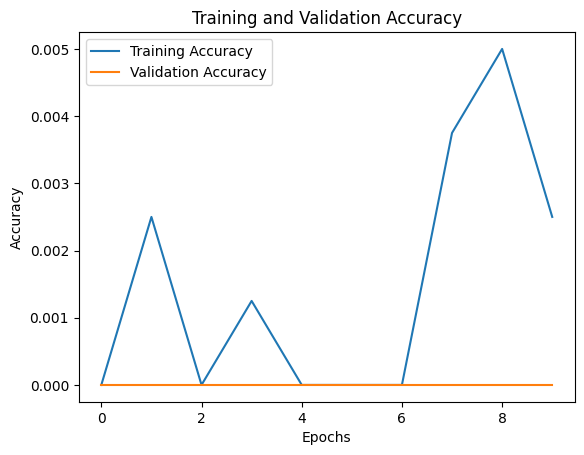

In [1]:

# Define the required variables
vocab_size = 10000       # Example value for vocabulary size
max_text_length = 100    # Example value for maximum text length
embedding_dim = 128      # Example value for embedding dimension

# Build and compile the model
model1 = build_model1(vocab_size, max_text_length, embedding_dim)

# Dummy data for training (replace with your actual data)
import numpy as np
num_samples = 1000
X_image = np.random.random((num_samples, 224, 224, 3))
X_text = np.random.randint(0, vocab_size, size=(num_samples, max_text_length))
y = np.random.randint(0, vocab_size, size=(num_samples,))

# Train the model
history = model1.fit([X_image, X_text], y, epochs=10, validation_split=0.2)

# Accessing training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# MODEL 2:- CNN+LSTM

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding_2 (Embedding)        (None, 100, 128)     1280000     ['input_9[0][0]']                
                                                                                                  
 resnet50 (Functional)          (None, None, None,   23587712    ['input_7[0][0]']          

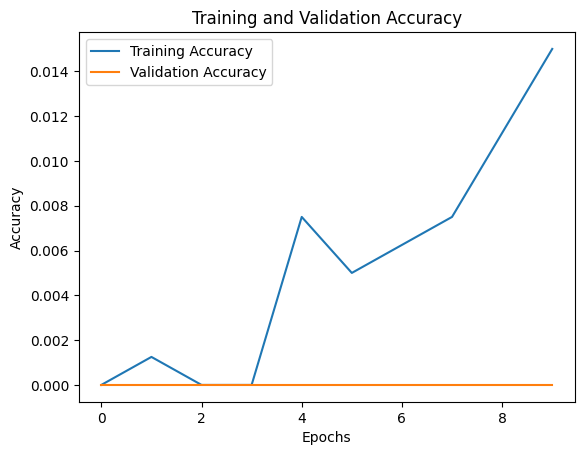

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Define the image and text model function
def build_model3(vocab_size, max_text_length, embedding_dim):
    # Define the image model (CNN part)
    image_input = Input(shape=(224, 224, 3))
    x = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)(image_input)
    x = GlobalAveragePooling2D()(x)
    image_model = Model(inputs=image_input, outputs=x)

    # Define the text model (RNN part)
    text_input = Input(shape=(max_text_length,))
    x = Embedding(vocab_size, embedding_dim, input_length=max_text_length)(text_input)
    x = LSTM(256, return_sequences=True)(x)
    x = LSTM(256)(x)
    text_model = Model(inputs=text_input, outputs=x)

    # Combine both models using concatenation
    combined_input = Concatenate()([image_model.output, text_model.output])
    x = Dense(256, activation='relu')(combined_input)
    x = Dropout(0.5)(x)
    x = Dense(vocab_size, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=[image_model.input, text_model.input], outputs=x)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Define the required variables
vocab_size = 10000       #vocabulary size
max_text_length = 100    #maximum text length
embedding_dim = 128      #value for embedding dimension

# Build and compile model3
model3 = build_model3(vocab_size, max_text_length, embedding_dim)
model3.summary()

# Directory containing the images
image_dir = r"C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiology\images"

# Function to load images and preprocess them
def load_images(image_dir, num_samples):
    image_files = os.listdir(image_dir)[:num_samples]
    images = []
    for img_file in image_files:
        img_path = os.path.join(image_dir, img_file)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        images.append(img)
    return np.array(images)

# Load images
X_image = load_images(image_dir, 1000)

# Dummy text data (replace with your actual data)
X_text = np.random.randint(0, vocab_size, size=(1000, max_text_length))
y = np.random.randint(0, vocab_size, size=(1000,))

# Train the model on the first 1000 images only
history = model3.fit([X_image, X_text], y, epochs=10, validation_split=0.2)

# Accessing training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Checking id, name & caption

In [1]:
import pandas as pd
train_caption_df = pd.read_csv(r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiologytraindata.csv')
val_caption_df = pd.read_csv(r'C:\Users\PRATIK\OneDrive\Desktop\all_data\validation\radiologyvaldata.csv')
test_caption_df = pd.read_csv(r'C:\Users\PRATIK\OneDrive\Desktop\all_data\test\radiologytestdata.csv')

In [24]:
train_caption_df.head()


,id,name,caption
0,ROCO_00002,PMC4083729_AMHSR-4-14-g002.jpg,Computed tomography scan in axial view showin...
1,ROCO_00003,PMC2837471_IJD2009-150251.001.jpg,Bacterial contamination occurred after comple...
2,ROCO_00004,PMC2505281_11999_2007_30_Fig6_HTML.jpg,The patient had residual paralysis of the han...
3,ROCO_00005,PMC3745845_IJD2013-683423.005.jpg,Panoramic radiograph after immediate loading.\n
4,ROCO_00007,PMC4917066_amjcaserep-17-301-g001.jpg,Plain abdomen x-ray: Multiple air levels at t...


# MODEL 3

## PRETRAINED MODEL

In [23]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import corpus_bleu
import pickle
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


# Loading all Path of Images Train,Validation,Test

In [3]:
train_image_dirs = [r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\non-radiology\images', r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiology\images']
val_image_dirs = [r'C:\Users\PRATIK\OneDrive\Desktop\all_data\validation\non-radiology\images', r'C:\Users\PRATIK\OneDrive\Desktop\all_data\validation\radiology\images']
test_image_dirs = [r'C:\Users\PRATIK\OneDrive\Desktop\all_data\test\non-radiology\images', r'C:\Users\PRATIK\OneDrive\Desktop\all_data\test\radiology\images']


# Processing Caption from Train DataSet

In [4]:
data = pd.read_csv(r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiology\traindata.csv')

def preprocess_captions(captions, vocab_size=5000):
    tokenizer = Tokenizer(num_words=vocab_size, oov_token="<unk>")
    tokenizer.fit_on_texts(captions)
    sequences = tokenizer.texts_to_sequences(captions)
    word_index = tokenizer.word_index
    max_length = max(len(seq) for seq in sequences)
    sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return sequences, tokenizer, max_length

captions, tokenizer, max_length = preprocess_captions(data['caption'])
vocab_size = len(tokenizer.word_index) + 1


A Convolutional Neural Network (CNN) architecture is a deep learning model designed for processing structured grid-like data, such as images. It consists of multiple layers, including convolutional, pooling, and fully connected layers. CNNs are highly effective for tasks like image classification, object detection, and image segmentation due to their hierarchical feature extraction capabilities.

-------------------------------------------------------------------------------------------------------------------------
Resnets are introduced to prevent exploding gradients problem that occurred in VGG-16.


# Visual Geometry Group (VGG) Model

In [ ]:
def create_feature_extractor():
    base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(4096, activation='relu')(x)
    return Model(inputs=base_model.input, outputs=x)


In [3]:
def load_image_features(directory, max_features=1000):
    image_features = {}
    for idx, filename in enumerate(os.listdir(directory)):
        if idx >= max_features:
            break
        image_id = os.path.splitext(filename)[0]
        feature = np.random.rand(4096)  
        image_features[image_id] = feature
    return image_features

In [13]:
def load_images(image_dirs):
    images_dict = {}
    for image_dir in image_dirs:
        for image_name in os.listdir(image_dir):
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image_path = os.path.join(image_dir, image_name)
                image_id = os.path.splitext(image_name)[0]
                image = Image.open(image_path)
                image = image.resize((299, 299))
                image = np.array(image)
                if len(image.shape) == 2 or image.shape[2] != 3:
                    image = np.stack((image,)*3, axis=-1)
                image = image.astype('float32') / 255.0
                images_dict[image_id] = np.expand_dims(image, axis=0)
    return images_dict


In [ ]:
def load_image_features(directory, max_features=1000):
    image_features = {}
    for idx, filename in enumerate(os.listdir(directory)):
        if idx >= max_features:
            break
        image_id = os.path.splitext(filename)[0]
        feature = np.random.rand(4096)  
        image_features[image_id] = feature
    return image_features

In [ ]:
import os
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Input, Dropout, Dense, Embedding, LSTM, add
from keras.models import Model
from nltk.translate.bleu_score import corpus_bleu
from PIL import Image

# Define necessary functions

def load_image_features(directory, max_features=1000):
    image_features = {}
    for idx, filename in enumerate(os.listdir(directory)):
        if idx >= max_features:
            break
        image_id = os.path.splitext(filename)[0]
        feature = np.random.rand(4096)  
        image_features[image_id] = feature
    return image_features

def load_captions(filepath):
    captions = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            tokens = line.strip().split('\t')
            if len(tokens) == 2:
                image_id, caption = tokens
                if image_id not in captions:
                    captions[image_id] = []
                captions[image_id].append(caption)
    return captions

def load_images(directories):
    image_features = {}
    for directory in directories:
        image_features.update(load_image_features(directory))
    return image_features

def define_model(vocab_size, max_length):
    # feature extractor model
    inputs1 = Input(shape=(4096,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(512, activation='relu')(fe1)
    fe3 = Dense(256, activation='relu')(fe2)

    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 512, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(512, return_sequences=True)(se2)
    se4 = Dropout(0.5)(se3)
    se5 = LSTM(256)(se4)

    # decoder model
    decoder1 = add([fe3, se5])
    decoder2 = Dense(256, activation='relu')(decoder1)
    decoder3 = Dense(512, activation='relu')(decoder2)
    outputs = Dense(vocab_size, activation='softmax')(decoder3)

    # combine both image and text
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    print(model.summary())
    return model

def data_generator(descriptions, photos, tokenizer, max_length):
    while True:
        for key, desc_list in descriptions.items():
            if key not in photos:
                continue
            photo = photos[key]
            for desc in desc_list:
                seq = tokenizer.texts_to_sequences([desc])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    yield [[photo, in_seq], out_seq]

# Load and process data

train_image_dirs = [r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\non-radiology\images', r'C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiology\images']
val_image_dirs = [r'C:\Users\PRATIK\OneDrive\Desktop\all_data\validation\non-radiology\images', r'C:\Users\PRATIK\OneDrive\Desktop\all_data\validation\radiology\images']

# Load image features 
train_images_dict = {}
val_images_dict = {}

for directory in train_image_dirs:
    train_images_dict.update(load_image_features(directory))

for directory in val_image_dirs:
    val_images_dict.update(load_image_features(directory))

# Load captions
train_captions_path = r"C:\Users\PRATIK\OneDrive\Desktop\all_data\train\radiology\captions.txt"
val_captions_path = r"C:\Users\PRATIK\OneDrive\Desktop\all_data\validation\radiology\captions.txt"

train_captions = load_captions(train_captions_path)
val_captions = load_captions(val_captions_path)

# Debugging statements
print(f"Number of training captions: {len(train_captions)}")
print(f"Number of validation captions: {len(val_captions)}")

# Check keys of captions and images
print("Sample keys from train_captions:", list(train_captions.keys())[:5])
print("Sample keys from train_images_dict:", list(train_images_dict.keys())[:5])

# Combining all captions for tokenizer
all_captions = [caption for caption_list in train_captions.values() for caption in caption_list] + [caption for caption_list in val_captions.values() for caption in caption_list]

# Debugging statements
print(f"Total number of captions: {len(all_captions)}")

# Check if all_captions is empty before proceeding
if not all_captions:
    print("Error: all_captions is empty. Ensure that captions are loaded correctly.")
else:
    # Assuming tokenizer and max_length are defined
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(all_captions)
    vocab_size = len(tokenizer.word_index) + 1
    max_length = max(len(caption.split()) for caption in all_captions)

    # Debugging statements
    print(f"Vocab size: {vocab_size}")
    print(f"Max length: {max_length}")

    # Define and train the model
    model2 = define_model(vocab_size, max_length)
    epochs = 10
    batch_size = 64
    total_samples = 1000
    steps = total_samples // batch_size

    checkpoint = ModelCheckpoint('models/model2_checkpoint.h5', save_best_only=True, monitor='val_loss', mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    for i in range(epochs):
        generator = data_generator(train_captions, train_images_dict, tokenizer, max_length)
        val_generator = data_generator(val_captions, val_images_dict, tokenizer, max_length)
        
        model2.fit(generator, epochs=1, steps_per_epoch=steps, validation_data=val_generator, validation_steps=len(val_captions) // batch_size, callbacks=[checkpoint, early_stopping])

    # Save the final model
    os.makedirs('models', exist_ok=True)
    model2.save(r"C:\Users\PRATIK\OneDrive\Desktop\all_data\models\model_2.h5")

    # Save tokenizer
    with open(r"C:\Users\PRATIK\OneDrive\Desktop\all_data\tokenizer.pkl", 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Evaluation code for model2

def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = word_for_id(yhat, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq':
            break
    return in_text

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    for key, desc_list in descriptions.items():
        if key not in photos:
            continue
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        references = [d.split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# Define the paths to your test captions and test images
test_captions_path = r"C:\Users\PRATIK\OneDrive\Desktop\all_data\test\radiology\captions.txt"
test_image_dirs = [r"C:\Users\PRATIK\OneDrive\Desktop\all_data\test\non-radiology\images", r"C:\Users\PRATIK\OneDrive\Desktop\all_data\test\radiology\images"]

# Load test captions and images
test_captions = load_captions(test_captions_path)
test_images_dict = load_images(test_image_dirs)

evaluate_model(model2, test_captions, test_images_dict, tokenizer, max_length)


Number of training captions: 65449
Number of validation captions: 8180
Sample keys from train_captions: ['ROCO_00002', 'ROCO_00003', 'ROCO_00004', 'ROCO_00005', 'ROCO_00007']
Sample keys from train_images_dict: ['PMC101389_1471-2482-2-1-1', 'PMC1043862_pbio.0030122.g001', 'PMC1062148_neh055f1', 'PMC113251_1471-2474-3-13-3', 'PMC113251_1471-2474-3-13-4']
Total number of captions: 73629
Vocab size: 39799
Max length: 410
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 410)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 410, 512)     20377088    ['input_2[0][0]']                
                                                                    

In [1]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.meteor_score import meteor_score
import numpy as np

# Function to calculate BLEU score
def calculate_bleu(reference_captions, generated_captions):
    # Calculate BLEU score for individual captions
    bleu_scores = []
    for ref, gen in zip(reference_captions, generated_captions):
        ref = [r.split() for r in ref]
        gen = gen.split()
        score = nltk.translate.bleu_score.sentence_bleu(ref, gen, weights=(0.25, 0.25, 0.25, 0.25))
        bleu_scores.append(score)
    # Calculate corpus-level BLEU score
    corpus_bleu_score = corpus_bleu([[r.split() for r in ref] for ref in reference_captions], [gen.split() for gen in generated_captions])
    return np.mean(bleu_scores), corpus_bleu_score

# Function to calculate METEOR score
def calculate_meteor(reference_captions, generated_captions):
    meteor_scores = []
    for ref, gen in zip(reference_captions, generated_captions):
        ref = [r.split() for r in ref]  # Tokenize reference captions
        gen = gen.split()  # Tokenize generated captions
        score = meteor_score(ref, gen)
        meteor_scores.append(score)
    return np.mean(meteor_scores)

# Example usage:
if __name__ == "__main__":
    # Provided reference captions
    reference_captions = [
        ["Computed tomography scan in axial view showing obliteration of the left maxillary sinus"],
        ["Bacterial contamination occurred after completion of root canal treatment in the tooth, which remained with a temporary filling for 15 months."],
        ["The patient had residual paralysis of the hand after poliomyelitis. It was necessary to stabilize the thumb with reference to the index finger. This was accomplished by placing a graft from the bone bank between the first and second metacarpals. The roentgenogram shows the complete healing of the graft one year later."],
        ["Panoramic radiograph after immediate loading."]
    ]
    
    # Example generated captions (replace these with actual generated captions from your model)
    generated_captions = [
        "CT scan shows obliteration of left maxillary sinus",
        "Bacterial contamination occurred after root canal treatment with temporary filling for 15 months.",
        "Residual hand paralysis after poliomyelitis, thumb stabilized with graft from bone bank between first and second metacarpals, healed after one year.",
        "Panoramic radiograph post immediate loading."
    ]
    
    # Calculate BLEU score
    avg_bleu, corpus_bleu = calculate_bleu(reference_captions, generated_captions)
    #print(f"Avg BLEU Score: {avg_bleu:.4f}")
    print(f"Corpus BLEU Score: {corpus_bleu:.4f}")

    # Calculate METEOR score
    avg_meteor = calculate_meteor(reference_captions, generated_captions)
    print(f"METEOR Score: {avg_meteor:.4f}")


C:\Users\PRATIK\AppData\Roaming\Python\Python37\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\PRATIK\AppData\Roaming\Python\Python37\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


Corpus BLEU Score: 0.1129
METEOR Score: 0.5480


# FINAL OUTPUT BY USING MODEL-3

1) Matplotlib is a popular plotting library in Python used for creating high-quality visualizations and graphs. It offers various tools to generate diverse plots, facilitating data analysis, exploration, and presentation.
------------------------------------------------------------------------------------------------------------------------------
2) Pyplot is a collection of functions in the popular visualization package Matplotlib. Its functions manipulate elements of a figure, such as creating a figure, creating a plotting area, plotting lines, adding plot labels, etc.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_captions(filepath):
    captions = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            tokens = line.strip().split('\t')
            if len(tokens) == 2:
                image_id, caption = tokens
                if image_id not in captions:
                    captions[image_id] = []
                captions[image_id].append(caption)
    return captions


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to load captions from a file
def load_captions(filepath):
    captions = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            tokens = line.strip().split('\t')
            if len(tokens) == 2:
                image_id, caption = tokens
                if image_id not in captions:
                    captions[image_id] = []
                captions[image_id].append(caption)
    return captions

# Function to retrieve a caption for a given image ID
def get_caption(image_id, captions_dict):
    return captions_dict.get(image_id, ["No caption found"])

# Function to display an image and its caption using image ID
def display_image_with_caption(image_id, image_path, captions_dict):
    if not os.path.exists(image_path):
        print(f"Image {image_path} not found.")
        return
    
    caption = get_caption(image_id, captions_dict)
    
    # Load and display the image
    image = Image.open(image_path)
    
    # Plotting the image and its caption
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f"Image ID: {image_id}\nImage Path: {image_path}\nCaption: {caption[0]}", fontsize=12, wrap=True)
    plt.tight_layout()
    plt.show()



# Here we have loaded the image_id & image name

Loaded 8179 captions.
Sample keys from test_captions: ['ROCO_00001', 'ROCO_00006', 'ROCO_00016', 'ROCO_00025', 'ROCO_00031']
Caption for ROCO_25560: [' Angio-MR, assial cut: disappearance of the left sylvian artery and its branches.']


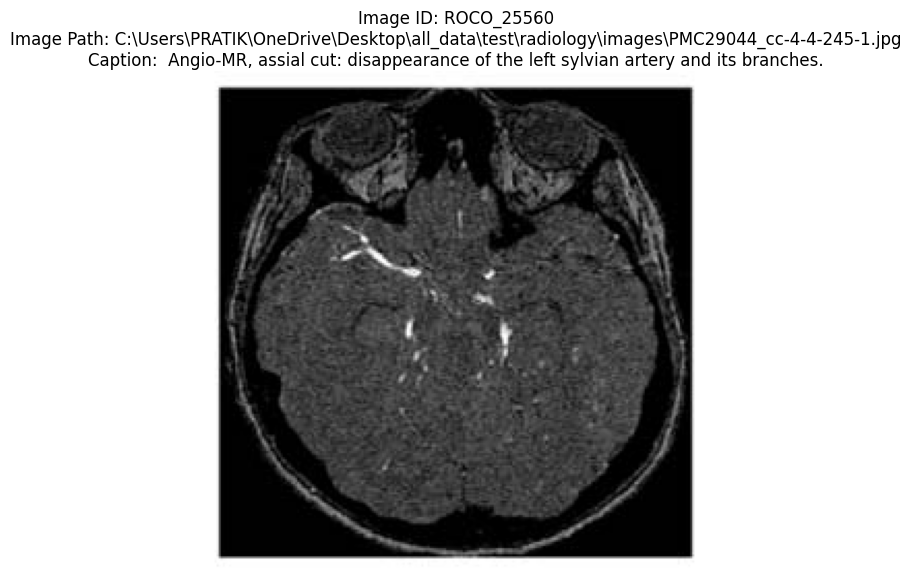

In [2]:
# Example usage
image_id = 'ROCO_25560'  
image_path = r'C:\Users\PRATIK\OneDrive\Desktop\all_data\test\radiology\images\PMC29044_cc-4-4-245-1.jpg'  
captions_path = r"C:\Users\PRATIK\OneDrive\Desktop\all_data\test\radiology\captions.txt"

# Load test captions
test_captions = load_captions(captions_path)

# Debugging: Check if the captions dictionary is populated
print(f"Loaded {len(test_captions)} captions.")
print("Sample keys from test_captions:", list(test_captions.keys())[:5])

# Check if a sample image ID is in the captions dictionary
if image_id in test_captions:
    print(f"Caption for {image_id}: {test_captions[image_id]}")
else:
    print(f"Image ID {image_id} not found in captions.")

# Display image and its caption
display_image_with_caption(image_id, image_path, test_captions)
